In [3]:
import openeo

connection = openeo.connect("openeo.vito.be")

In [6]:
connection = openeo.connect(
    "openeo.dataspace.copernicus.eu"
).authenticate_oidc()

Authenticated using refresh token.


In [7]:
sentinel2_cube = connection.load_collection(
    "SENTINEL2_L2A",
    spatial_extent={"west": 5.14, "south": 51.17, "east": 5.17, "north": 51.19},
    temporal_extent = ["2021-02-01", "2021-04-30"],
    bands=["B02", "B04", "B08"]
)

In [8]:
blue = sentinel2_cube.band("B02") * 0.0001
red = sentinel2_cube.band("B04") * 0.0001
nir = sentinel2_cube.band("B08") * 0.0001

In [9]:
evi_cube = 2.5 * (nir - red) / (nir + 6.0 * red - 7.5 * blue + 1.0)

In [10]:
evi_composite = evi_cube.max_time()

In [11]:
evi_composite.download("evi-composite.tiff")

In [12]:
import os

# Preverite trenutni delovni imenik
current_directory = os.getcwd()
print("Trenutni delovni imenik:", current_directory)

Trenutni delovni imenik: c:\Users\zigao\OneDrive - Univerza v Ljubljani\Documents\GitHub repository\nasa-arset-part3


In [5]:
%matplotlib inline

import numpy as np
import rasterio as rio
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [6]:
dataset = rio.open(r"C:\Users\zigao\OneDrive - Univerza v Ljubljani\Documents\GitHub repository\nasa-arset-part3\evi-composite.tiff")

print('{} opened in {} mode'.format(dataset.name,dataset.mode))
print('image has {} band(s)'.format(dataset.count))
print('image size (width, height): {} x {}'.format(dataset.width, dataset.height))
print('band 1 dataype is {}'.format(dataset.dtypes[0])) # note that the band name (Band 1) differs from the list index [0]

C:/Users/zigao/OneDrive - Univerza v Ljubljani/Documents/GitHub repository/nasa-arset-part3/evi-composite.tiff opened in r mode
image has 1 band(s)
image size (width, height): 217 x 230
band 1 dataype is float32


In [7]:
print(dataset.bounds)

BoundingBox(left=649540.0, bottom=5670900.0, right=651710.0, top=5673200.0)


In [8]:
print(dataset.crs)

EPSG:32631


In [9]:
print(dataset.transform)


| 10.00, 0.00, 649540.00|
| 0.00,-10.00, 5673200.00|
| 0.00, 0.00, 1.00|


In [10]:
img = dataset.read()

In [13]:
print(img.shape) # returns a tuple with the number of image bands bands, image height, and image width.
print(img[0]) # will return an IndexError, because while there are 7 bands, the indices range from 0 to 6.

(1, 230, 217)
[[0.6269995  0.47433332 0.902317   ... 0.60869443 0.39041406 0.3639757 ]
 [0.57457703 0.51181096 0.32645726 ... 0.42643195 1.7612824  0.880742  ]
 [0.42962125 0.5012637  2.6285448  ... 0.4248886  0.49857002 0.44444057]
 ...
 [0.53210855 0.5861061  0.79999727 ... 0.25614905 0.7173937  0.32524508]
 [0.504504   0.4337432  0.48997784 ... 0.28050467 0.79051167 0.3258125 ]
 [0.3394605  0.43870187 0.44166112 ... 0.40769795 0.3362734  0.481588  ]]


In [15]:
with rio.open(r"C:\Users\zigao\OneDrive - Univerza v Ljubljani\Documents\GitHub repository\nasa-arset-part3\evi-composite.tiff") as dataset:
    img = dataset.read()
    xmin, ymin, xmax, ymax = dataset.bounds

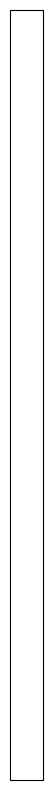

In [17]:
ni_utm = ccrs.UTM(33) # note that this matches with the CRS of our image
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw=dict(projection=ni_utm))

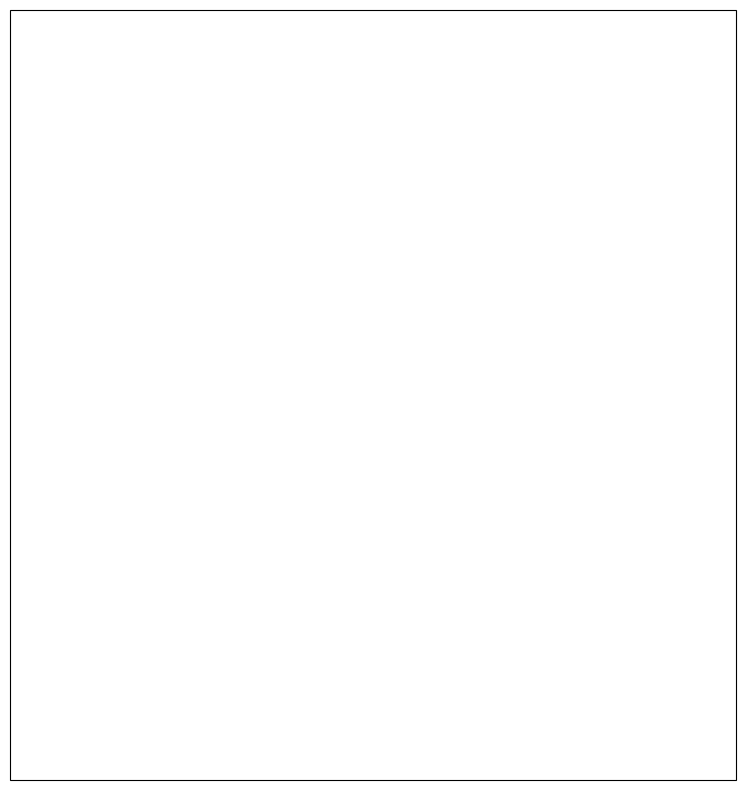

In [18]:
ax.imshow(img[0], cmap='gray', vmin=0, vmax=1) # display band 4 as a grayscale image, stretched between 200 and 5000
ax.set_extent([xmin, xmax, ymin, ymax], crs=ni_utm) # set the extent to the image boundary

fig # show the figure

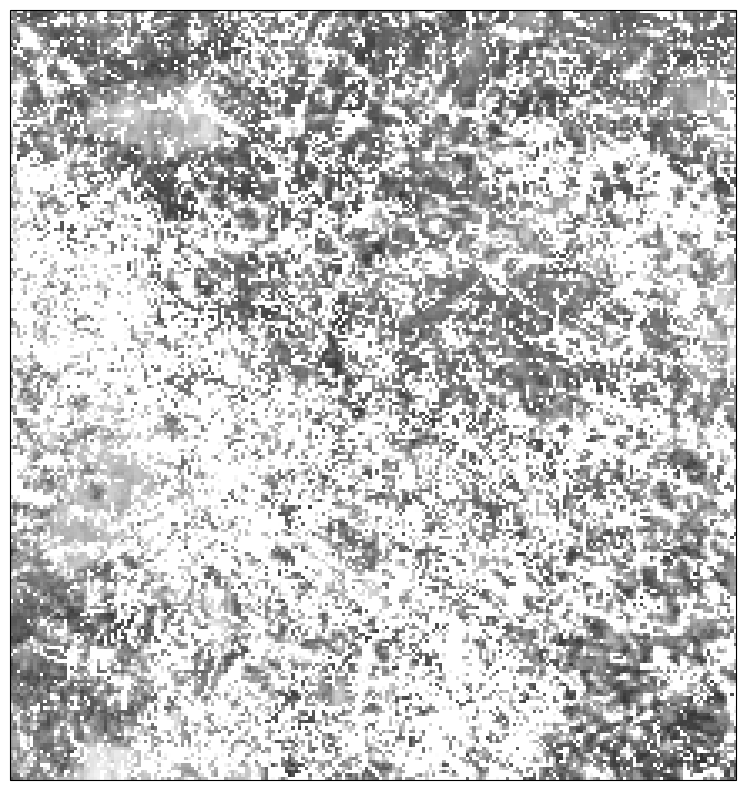

In [19]:
ax.imshow(img[0], cmap='gray', vmin=0, vmax=1, transform=ni_utm, extent=[xmin, xmax, ymin, ymax])
ax.set_extent([xmin, xmax, ymin, ymax], crs=ni_utm) # set the extent to the image boundary

fig